## Introduction

## Business Understanding
The goal of this notebook is to analyze box office movies dataset and generate findings that Microsoft would rely on to start their new movie studio

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data from the first dataset(movie budgets datasets)
df1=pd.read_csv('tn.movie_budgets.csv',parse_dates=['release_date'])
df1.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [3]:
#loading the second dataset(tmdb movies)
df3=pd.read_csv('tmdb.movies.csv',parse_dates=['release_date'])
df3.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [4]:
#merging the two datasets into one
df = pd.merge(df1, df3, how="right",on="id")

df.head(2)

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,12444,NaT,NaN,NaN,NaN,NaN,0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,NaT,NaN,NaN,NaN,NaN,1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [5]:
#checking the number of rows and columns the merged dataset has
df.shape

(26855, 15)

In [6]:
#checking columns with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26855 entries, 0 to 26854
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 26855 non-null  int64         
 1   release_date_x     344 non-null    datetime64[ns]
 2   movie              344 non-null    object        
 3   production_budget  344 non-null    object        
 4   domestic_gross     344 non-null    object        
 5   worldwide_gross    344 non-null    object        
 6   Unnamed: 0         26855 non-null  int64         
 7   genre_ids          26855 non-null  object        
 8   original_language  26855 non-null  object        
 9   original_title     26855 non-null  object        
 10  popularity         26855 non-null  float64       
 11  release_date_y     26855 non-null  datetime64[ns]
 12  title              26855 non-null  object        
 13  vote_average       26855 non-null  float64       
 14  vote_c

In [7]:
#checking the datatypes of the columns
df.dtypes

id                            int64
release_date_x       datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
Unnamed: 0                    int64
genre_ids                    object
original_language            object
original_title               object
popularity                  float64
release_date_y       datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [8]:
#dropping unneccessary columns
df.drop(['Unnamed: 0','genre_ids'],axis=1,inplace=True)

In [9]:
#converting production_budget,worldwide_gross,domestic_gross columns into float data types
df['production_budget'] = df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [10]:
#filling null values of the production_budget  with mean
df['production_budget']=df['production_budget'].fillna(df['production_budget'].mean())

In [11]:
#checking the columns after data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26855 entries, 0 to 26854
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 26855 non-null  int64         
 1   release_date_x     344 non-null    datetime64[ns]
 2   movie              344 non-null    object        
 3   production_budget  26855 non-null  float64       
 4   domestic_gross     344 non-null    float64       
 5   worldwide_gross    344 non-null    float64       
 6   original_language  26855 non-null  object        
 7   original_title     26855 non-null  object        
 8   popularity         26855 non-null  float64       
 9   release_date_y     26855 non-null  datetime64[ns]
 10  title              26855 non-null  object        
 11  vote_average       26855 non-null  float64       
 12  vote_count         26855 non-null  int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory 

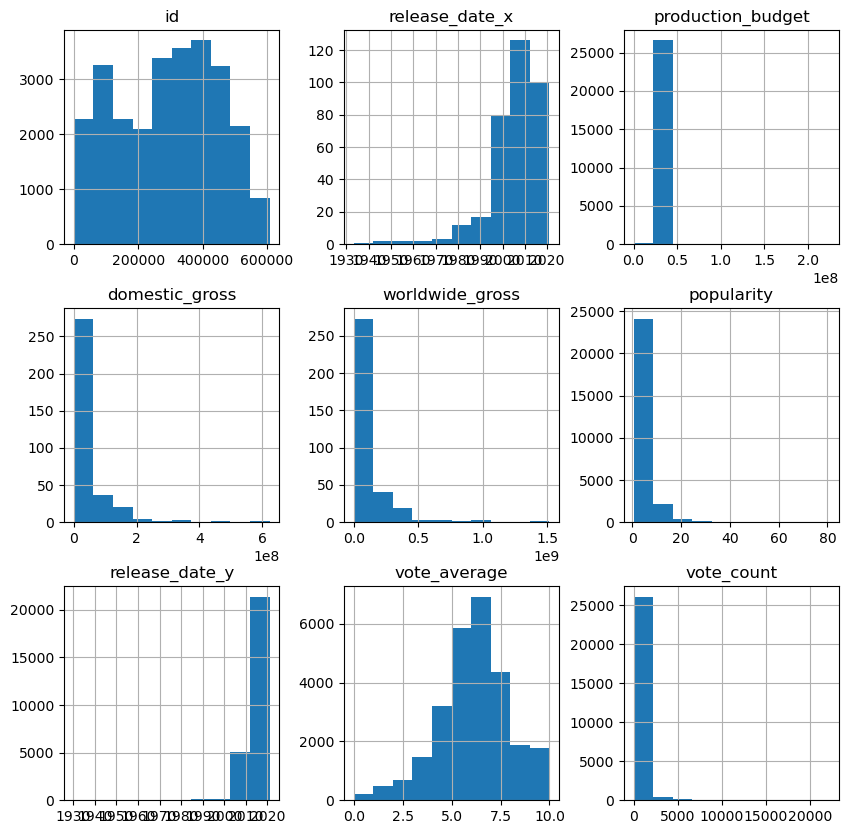

In [12]:
#visualizing distributions of various features in the dataset
df.hist(figsize=(10,10));